# Importing Librarys

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pypyodbc as podbc
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Making connection from SQL Database to python Jupyter Notebook

In [2]:
connection = podbc.connect("Driver= {SQL Server Native Client 11.0};"
                         "Server=DESKTOP-DOGDV3S\SQLEXPRESS;"
                         "Database=Customer;"
                         "Trusted_Connection=yes;")

In [3]:
SQL_query = pd.read_sql_query(''' SELECT * FROM [dbo].[Credit Card Dataset for Clustering] ''',connection)

In [4]:
SQL_query.head()

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,C10001,40.900749,0.818182,95.400002,0.000000,95.400002,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802078,139.509781,0.000000,12
1,C10002,3202.467529,0.909091,0.000000,0.000000,0.000000,6442.945312,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032715,1072.340210,0.222222,12
2,C10003,2495.148926,1.000000,773.169983,773.169983,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066772,627.284790,0.000000,12
3,C10004,1666.670532,0.636364,1499.000000,1499.000000,0.000000,205.788010,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714355,1.000000,16.000000,16.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334778,244.791245,0.000000,12


In [5]:
SQL_query.drop('cust_id',axis=1,inplace=True)

In [6]:
SQL_query

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.400002,0.000000,95.400002,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802078,139.509781,0.000000,12
1,3202.467529,0.909091,0.000000,0.000000,0.000000,6442.945312,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032715,1072.340210,0.222222,12
2,2495.148926,1.000000,773.169983,773.169983,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066772,627.284790,0.000000,12
3,1666.670532,0.636364,1499.000000,1499.000000,0.000000,205.788010,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714355,1.000000,16.000000,16.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334778,244.791245,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9147,NaN,35.000000,120.000000,79.000000,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,None
9148,NaN,45.000000,126.000000,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,None
9149,NaN,32.000000,126.000000,74.000000,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,None
9150,NaN,32.000000,137.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,None


### Feture Enginnering - Deleting null values

In [7]:
SQL_query.isnull().sum()

balance                             202
balance_frequency                     2
purchases                             2
oneoff_purchases                      2
installments_purchases              202
cash_advance                        202
purchases_frequency                 202
oneoff_purchases_frequency          202
purchases_installments_frequency    202
cash_advance_frequency              202
cash_advance_trx                    202
purchases_trx                       202
credit_limit                        212
payments                            202
minimum_payments                    515
prc_full_payment                    202
tenure                              202
dtype: int64

In [8]:
SQL_query.dropna(inplace=True)

In [9]:
SQL_query.isnull().sum()

balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

In [10]:
SQL_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8627 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance                           8627 non-null   float64
 1   balance_frequency                 8627 non-null   float64
 2   purchases                         8627 non-null   float64
 3   oneoff_purchases                  8627 non-null   float64
 4   installments_purchases            8627 non-null   float64
 5   cash_advance                      8627 non-null   float64
 6   purchases_frequency               8627 non-null   float64
 7   oneoff_purchases_frequency        8627 non-null   float64
 8   purchases_installments_frequency  8627 non-null   float64
 9   cash_advance_frequency            8627 non-null   float64
 10  cash_advance_trx                  8627 non-null   object 
 11  purchases_trx                     8627 non-null   object 
 12  credit

<AxesSubplot:>

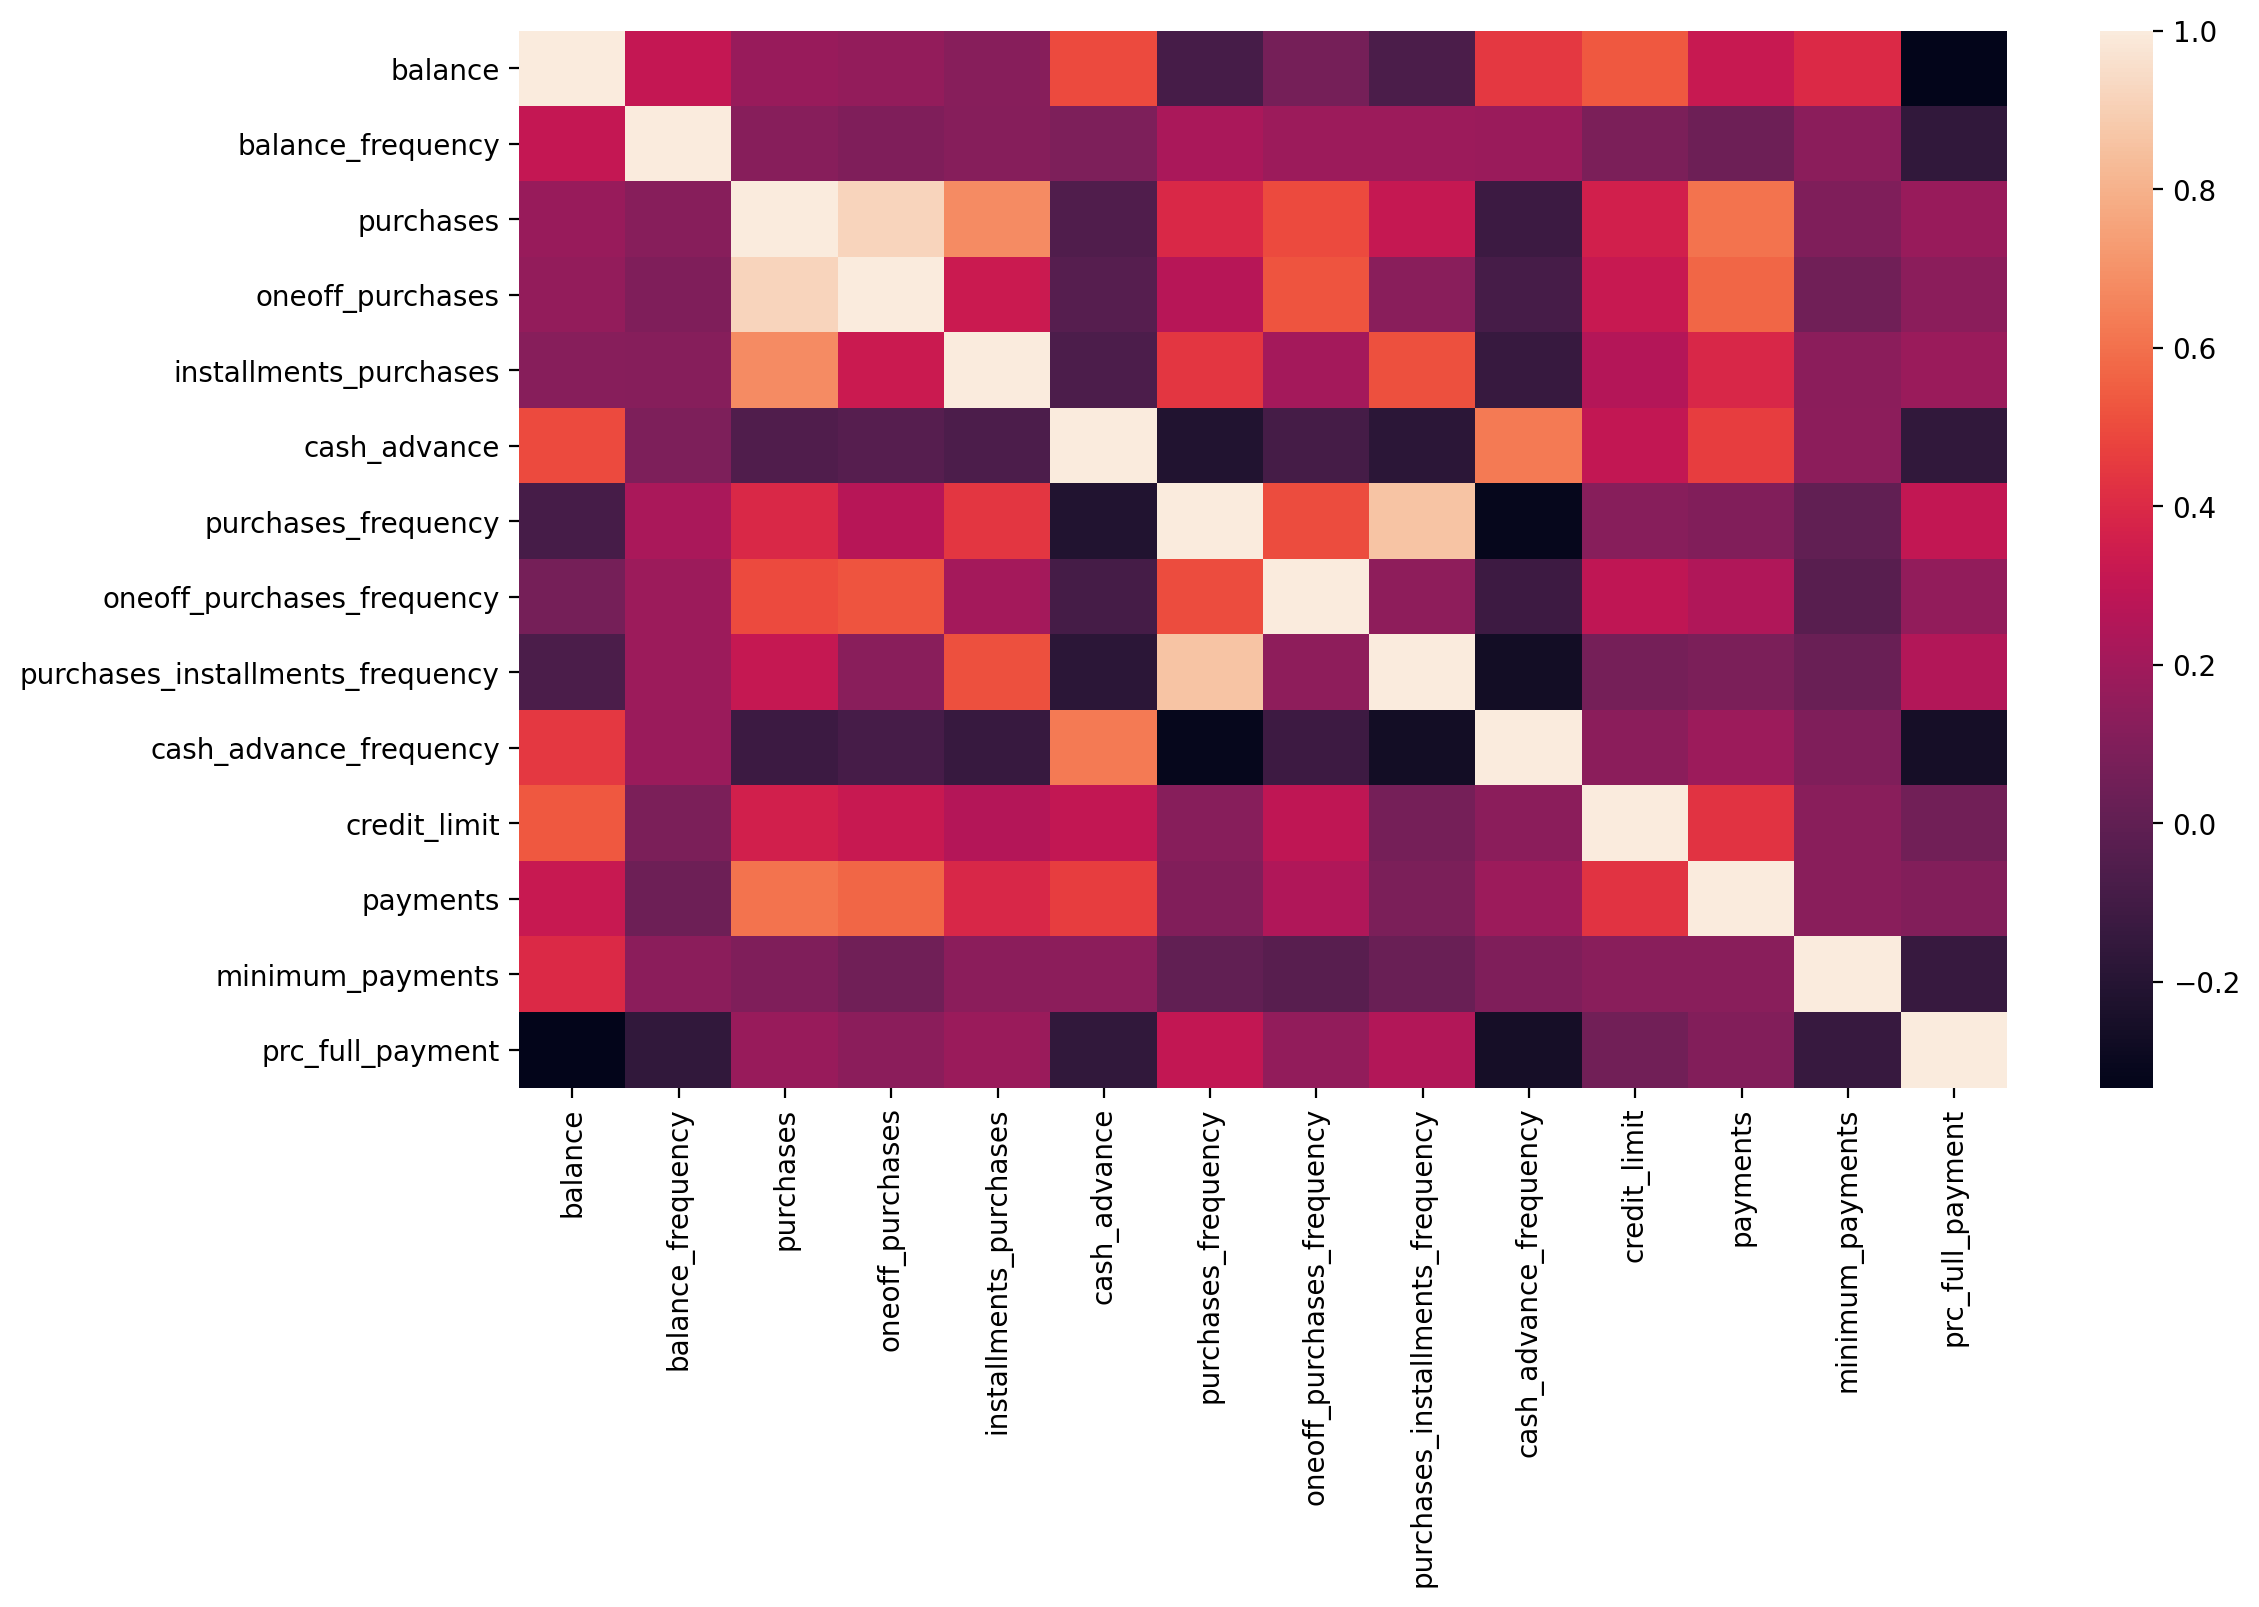

In [11]:
plt.figure(figsize=(12,7),dpi=200)
sns.heatmap(SQL_query.corr())

#  investigate all elements in each features

In [12]:
for column in SQL_query:
    unique_value = np.unique(SQL_query[column])
    value = len(unique_value)
    if value < 10:
        print('the number of value for the feturre  :{}, {}, {}'.format(column,value,unique_value))
    else:
        print('the number of value for the feturre:{}______________________:{}'.format(column,value))
    

the number of value for the feturre:balance______________________:8622
the number of value for the feturre:balance_frequency______________________:42
the number of value for the feturre:purchases______________________:6008
the number of value for the feturre:oneoff_purchases______________________:3917
the number of value for the feturre:installments_purchases______________________:4337
the number of value for the feturre:cash_advance______________________:4203
the number of value for the feturre:purchases_frequency______________________:47
the number of value for the feturre:oneoff_purchases_frequency______________________:47
the number of value for the feturre:purchases_installments_frequency______________________:47
the number of value for the feturre:cash_advance_frequency______________________:54
the number of value for the feturre:cash_advance_trx______________________:65
the number of value for the feturre:purchases_trx______________________:173
the number of value for the feturr

# Feture scaling

In [13]:
scaler = StandardScaler()

In [14]:
scaled_df = scaler.fit_transform(SQL_query)

In [15]:
scaled_df

array([[-0.74475947, -0.37171253, -0.42910839, ..., -0.30558685,
        -0.53743618,  0.35519838],
       [ 0.76361307,  0.0664118 , -0.47311248, ...,  0.08741739,
         0.21303856,  0.35519838],
       [ 0.42615382,  0.50453613, -0.11648104, ..., -0.10008578,
        -0.53743618,  0.35519838],
       ...,
       [-0.75310965, -0.2986941 , -0.40650671, ..., -0.32963963,
         0.30684874, -4.22065492],
       [-0.75785252, -0.2986941 , -0.47311248, ..., -0.34087272,
         0.30684874, -4.22065492],
       [-0.58645535, -1.10191974,  0.03115867, ..., -0.32716633,
        -0.53743618, -4.22065492]])

In [16]:
SQL_query.shape

(8627, 17)

In [17]:
scaled_df.shape

(8627, 17)

#  Kmeans

In [19]:
# Running Kmeans with 4 cluster

model = KMeans(n_clusters=4)
label = model.fit_predict(scaled_df)

# the predicted labels for 4 clusters
print('clusters:', label)

# model intertia
four_cluster_intertia = model.inertia_
print('model inertia is:',four_cluster_intertia)

clusters: [2 0 1 ... 1 2 2]
model inertia is: 95539.59258151495


# Elbow method for investigating optimum K value

In [20]:
ssd = []
for k in range(2,20):
    
    model = KMeans(n_clusters=k)
    model.fit_predict(scaled_df)
    ssd.append(model.inertia_)
    

Text(0.5, 1.0, 'intertia')

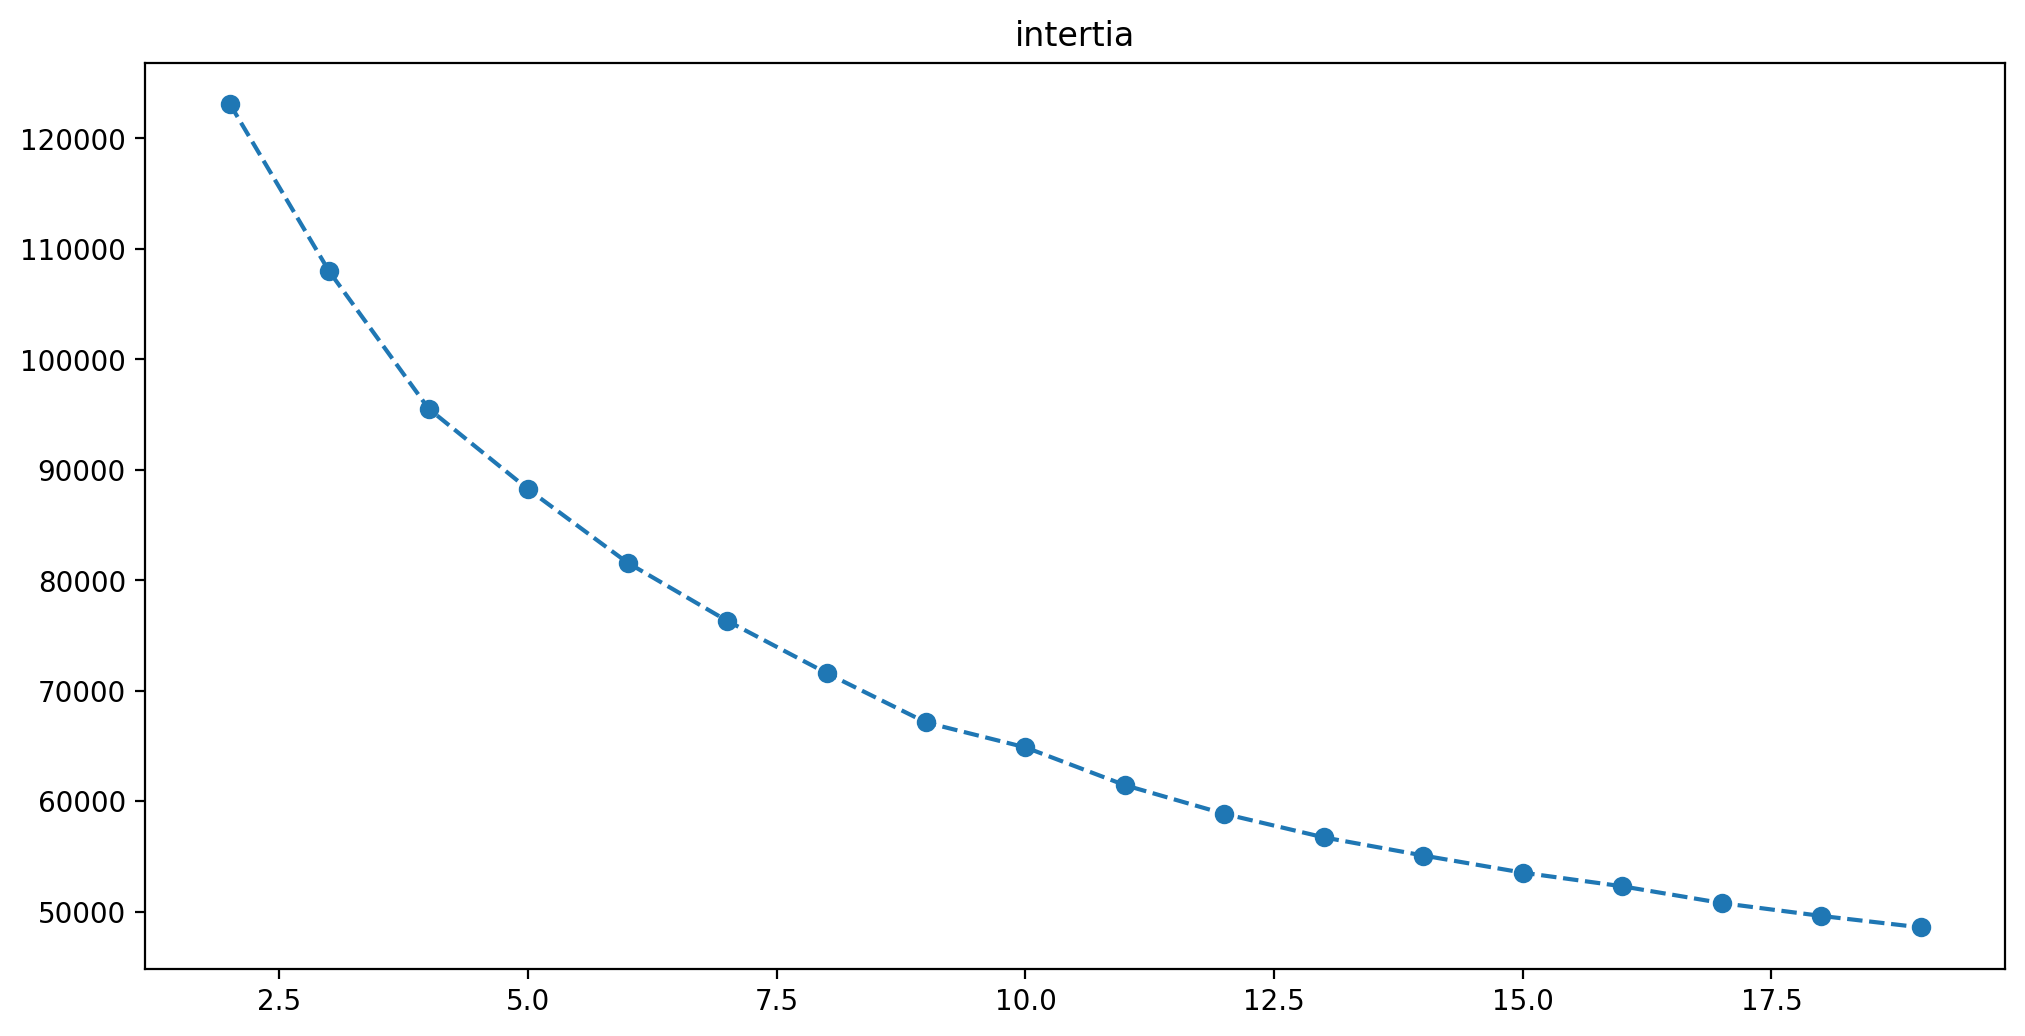

In [21]:
plt.figure(figsize=(12,6),dpi=200)
plt.plot(range(2,20),ssd,'--o')
plt.title('intertia')

                      it seems five clusters are best to train due to steep down in elbow method 

In [22]:
ssd = []
num_of_clusters = range(2,20)
for k in num_of_clusters:
    
    
    model = KMeans(n_clusters=k,random_state=101)
    model.fit(scaled_df)
    intertia = model.inertia_
    ssd.append(intertia)
    
    print('The intertia for :',k,'cluster is:',intertia)

The intertia for : 2 cluster is: 123144.33857585207
The intertia for : 3 cluster is: 107969.52901511041
The intertia for : 4 cluster is: 95539.68325212451
The intertia for : 5 cluster is: 88242.1738598919
The intertia for : 6 cluster is: 81597.2215243452
The intertia for : 7 cluster is: 76344.66036149183
The intertia for : 8 cluster is: 71611.35000429851
The intertia for : 9 cluster is: 68114.19086299272
The intertia for : 10 cluster is: 63722.96786000316
The intertia for : 11 cluster is: 61072.97302058109
The intertia for : 12 cluster is: 58862.60361780054
The intertia for : 13 cluster is: 56754.55800413113
The intertia for : 14 cluster is: 55098.24923624164
The intertia for : 15 cluster is: 53632.32736077002
The intertia for : 16 cluster is: 52003.17254102643
The intertia for : 17 cluster is: 50993.57577750974
The intertia for : 18 cluster is: 49475.99325757768
The intertia for : 19 cluster is: 48888.87823761683


                                      all cluster's intertia

In [33]:
model = KMeans(n_clusters=5,random_state=101)
label = model.fit_predict(scaled_df)

# the predicted labels for 5 clusters
print('clusters:', label)

# model intertia
print('four cluster intertia:',four_cluster_intertia,'\n')
 
print('five cluster model inertia is:',model.inertia_)

clusters: [1 3 0 ... 2 1 1]
four cluster intertia: 95539.59258151495 

five cluster model inertia is: 88242.1738598919


In [27]:
inverse_df = scaler.inverse_transform(scaled_df)

In [31]:
df = pd.DataFrame(data=inverse_df,columns=SQL_query.columns)

In [35]:
df['cluster'] = label

In [36]:
df.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,cluster
0,40.900749,0.818182,95.400002,0.000000,95.400002,0.000000,0.166667,0.000000,0.083333,0.00,0.0,2.000000e+00,1000.0,201.802078,139.509781,0.000000,12.0,1
1,3202.467529,0.909091,0.000000,0.000000,0.000000,6442.945312,0.000000,0.000000,0.000000,0.25,4.0,-1.776357e-15,7000.0,4103.032715,1072.340210,0.222222,12.0,3
2,2495.148926,1.000000,773.169983,773.169983,0.000000,0.000000,1.000000,1.000000,0.000000,0.00,0.0,1.200000e+01,7500.0,622.066772,627.284790,0.000000,12.0,0
3,817.714355,1.000000,16.000000,16.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.00,0.0,1.000000e+00,1200.0,678.334778,244.791245,0.000000,12.0,1
4,1809.828735,1.000000,1333.280029,0.000000,1333.280029,0.000000,0.666667,0.000000,0.583333,0.00,0.0,8.000000e+00,1800.0,1400.057739,2407.246094,0.000000,12.0,2


                                    Added label column in Datafream

# Implimanting PCA

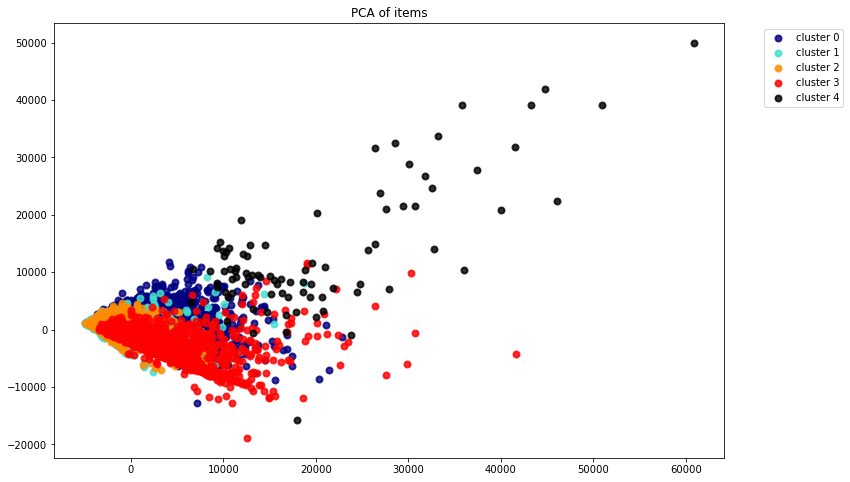

In [128]:
X_train = df.drop('cluster',axis=1)
y = df['cluster']

pca = PCA(n_components=2,random_state=101)
X = pca.fit_transform(X_train)

plt.figure(figsize=(12,8))
colours = ['navy','turquoise','darkorange','red','black']
target_name = ['cluster 0','cluster 1','cluster 2','cluster 3','cluster 4']
lw = 2

for color, i, target_name in zip(colours,[0,1,2,3,4],target_name):
    plt.scatter(X[y ==i,0],X[y == i, 1],color=color,alpha=.8,lw=lw,label=target_name)
    

plt.legend(loc='best',shadow=False,scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.6)
plt.title('PCA of items')
plt.show()

In [66]:
X.shape

(8627, 2)

In [73]:
n_componunts = X_train.shape[1]

 
pca = PCA(n_components=n_componunts,random_state=89)
pca.fit_transform(X_train)

total_variance = sum(pca.explained_variance_ratio_)
print('total variance ratio: ', total_variance)

var_95 = total_variance * 0.95
print('the 95 % variance :',var_95)


a = zip(range(0,n_componunts),pca.explained_variance_ratio_)
a = pd.DataFrame(a,columns=['PCA Componunt','Explained variance ratio'])

total variance ratio:  0.9999999999999994
the 95 % variance : 0.9499999999999994


In [83]:
print('explain variance ration for 0 componunt is: ',sum(a['Explained variance ratio'][0:2]))
print('explain variance ration for 1 componunt is: ',sum(a['Explained variance ratio'][0:3]))
print('explain variance ration for 2 componunt is: ',sum(a['Explained variance ratio'][0:4]))
print('explain variance ration for 3 componunt is: ',sum(a['Explained variance ratio'][0:5]))
print('explain variance ration for 4 componunt is: ',sum(a['Explained variance ratio'][0:6]))
print('explain variance ration for 5 componunt is: ',sum(a['Explained variance ratio'][0:7]))
print('explain variance ration for 6 componunt is: ',sum(a['Explained variance ratio'][0:8]))
print('explain variance ration for 7 componunt is: ',sum(a['Explained variance ratio'][0:9]))
print('explain variance ration for 8 componunt is: ',sum(a['Explained variance ratio'][0:10]))
print('explain variance ration for 9 componunt is: ',sum(a['Explained variance ratio'][0:11]))
print('explain variance ration for 10 componunt is: ',sum(a['Explained variance ratio'][0:12]))
print('explain variance ration for 11 componunt is: ',sum(a['Explained variance ratio'][0:13]))
print('explain variance ration for 12 componunt is: ',sum(a['Explained variance ratio'][0:14]))
print('explain variance ration for 13 componunt is: ',sum(a['Explained variance ratio'][0:15]))
print('explain variance ration for 14 componunt is: ',sum(a['Explained variance ratio'][0:16]))
print('explain variance ration for 15 componunt is: ',sum(a['Explained variance ratio'][0:17]))


explain variance ration for 0 componunt is:  0.6531250359096411
explain variance ration for 1 componunt is:  0.7932991856447744
explain variance ration for 2 componunt is:  0.9079853250529353
explain variance ration for 3 componunt is:  0.9552068761131558
explain variance ration for 4 componunt is:  0.9817611684302856
explain variance ration for 5 componunt is:  0.9999919135394381
explain variance ration for 6 componunt is:  0.9999986310484531
explain variance ration for 7 componunt is:  0.9999993637330414
explain variance ration for 8 componunt is:  0.9999999557773877
explain variance ration for 9 componunt is:  0.9999999919152726
explain variance ration for 10 componunt is:  0.9999999960045026
explain variance ration for 11 componunt is:  0.9999999974614084
explain variance ration for 12 componunt is:  0.9999999988645053
explain variance ration for 13 componunt is:  0.999999999589754
explain variance ration for 14 componunt is:  0.9999999998483516
explain variance ration for 15 compo

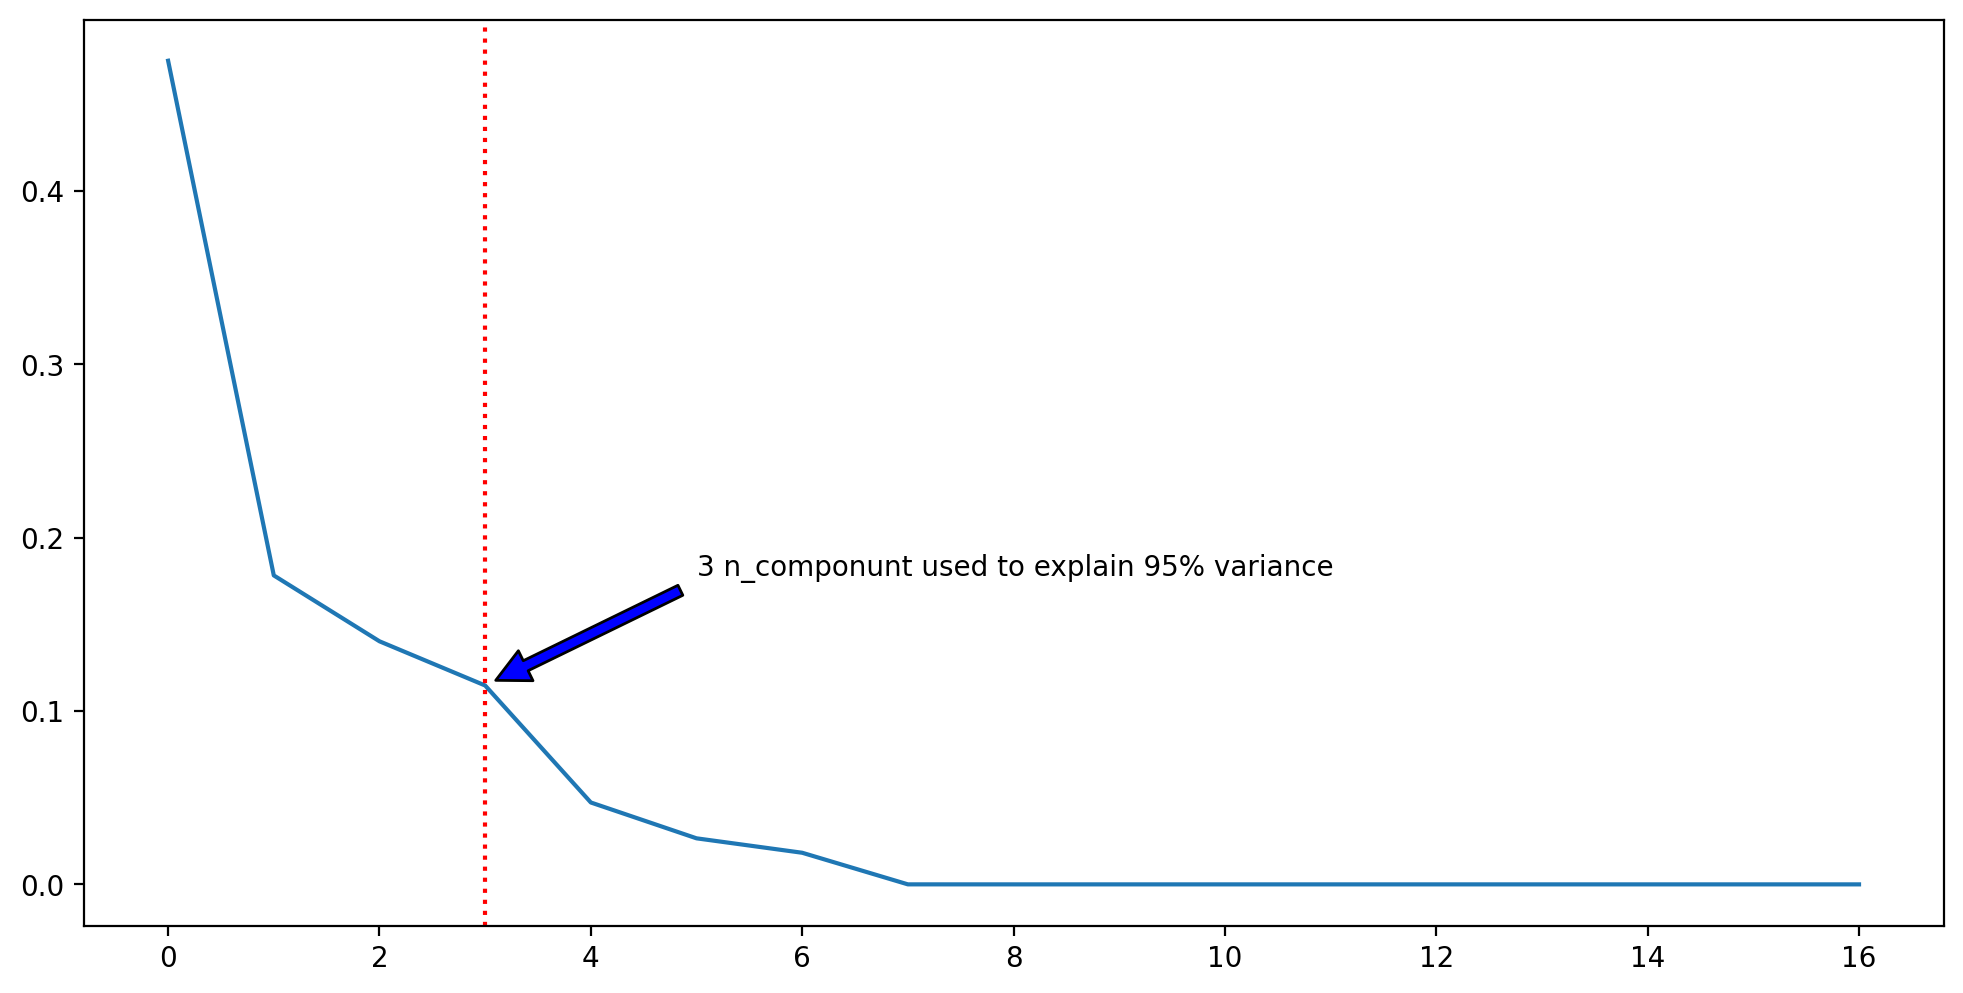

In [126]:
plt.figure(figsize=(12,6),dpi=200)
plt.plot(pca.explained_variance_ratio_)

plt.axvline(x=3,linestyle=':',color='red',label='n_compunts - 95 %')
 
plt.annotate('3 n_componunt used to explain 95% variance',xy=(3,pca.explained_variance_ratio_[3]),
            xytext=(5,pca.explained_variance_ratio_[1]),
            arrowprops=dict(facecolor='blue',shrink=0.05))
plt.show()

                                    it seems we should run 3 n componunts in pca

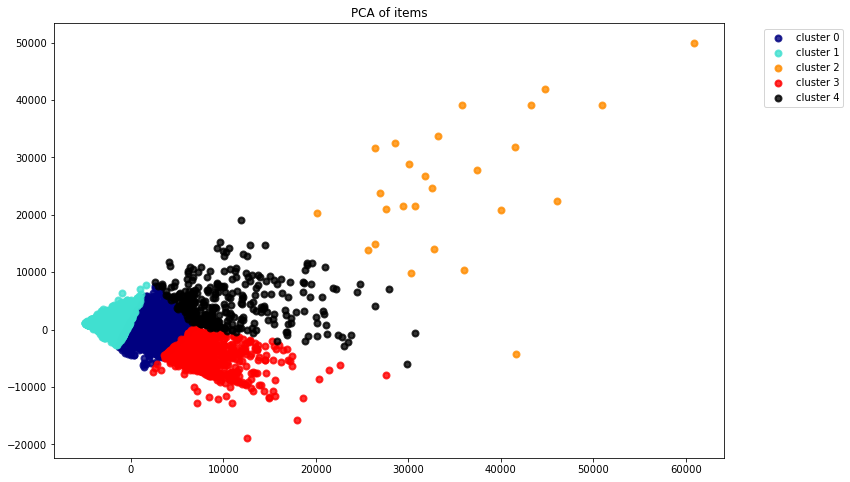

In [141]:
pca = PCA(n_components=2,random_state=101)
X = pca.fit_transform(X_train)


model = KMeans(n_clusters=5,random_state=101)
y = model.fit_predict(X)


plt.figure(figsize=(12,8))
colours = ['navy','turquoise','darkorange','red','black']
target_name = ['cluster 0','cluster 1','cluster 2','cluster 3','cluster 4']
lw = 2

for color, i, target_name in zip(colours,[0,1,2,3,4],target_name):
    plt.scatter(X[y ==i,0],X[y == i, 1],color=color,alpha=.8,lw=lw,label=target_name)
    

plt.legend(loc='best',shadow=False,scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.6)
plt.title('PCA of items')
plt.show()

In [160]:
final_datafream['Clusters'].value_counts().sort_values()

2      26
4     307
3     712
0    2532
1    5050
Name: Clusters, dtype: int64

In [162]:
def Rename_clusters(clusters):
    df = []
    for i in clusters:
        if i == 0:
            value = 1
            df.append(value)
        elif i == 1:
            value = 2
            df.append(value)
        elif i == 2:
            value = 3
            df.append(value)
        elif i == 3:
            value = 4
            df.append(value)
        elif i == 4:
            value = 5
            df.append(value)
        else:
            pass
    return df

In [164]:
renewed_clusters_name()

In [189]:
X_train['Clusters'].value_counts().sort_values()

2      26
4     307
3     712
0    2532
1    5050
Name: Clusters, dtype: int64

In [191]:
yy = Rename_clusters(X_train['Clusters'])

In [194]:
# here i changed cluster names 1 to 5
pd.DataFrame(data=yy,columns=['Clusters']).value_counts().sort_values()

Clusters
3             26
5            307
4            712
1           2532
2           5050
dtype: int64

In [195]:
final_datafream['Clusters'] = yy

In [196]:
final_datafream.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,Clusters
0,40.900749,0.818182,95.400002,0.000000,95.400002,0.000000,0.166667,0.000000,0.083333,0.00,0.0,2.000000e+00,1000.0,201.802078,139.509781,0.000000,12.0,2
1,3202.467529,0.909091,0.000000,0.000000,0.000000,6442.945312,0.000000,0.000000,0.000000,0.25,4.0,-1.776357e-15,7000.0,4103.032715,1072.340210,0.222222,12.0,1
2,2495.148926,1.000000,773.169983,773.169983,0.000000,0.000000,1.000000,1.000000,0.000000,0.00,0.0,1.200000e+01,7500.0,622.066772,627.284790,0.000000,12.0,1
3,817.714355,1.000000,16.000000,16.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.00,0.0,1.000000e+00,1200.0,678.334778,244.791245,0.000000,12.0,2
4,1809.828735,1.000000,1333.280029,0.000000,1333.280029,0.000000,0.666667,0.000000,0.583333,0.00,0.0,8.000000e+00,1800.0,1400.057739,2407.246094,0.000000,12.0,2


# Exporting Final Datafream to mysql DataBase

In [204]:
from sqlalchemy import create_engine
import urllib


quoted = urllib.parse.quote_plus("Driver= {SQL Server Native Client 11.0};"
                         "Server=DESKTOP-DOGDV3S\SQLEXPRESS;"
                         "Database=Customer;"
                         "Trusted_Connection=yes;")

engine = create_engine('mssql+pyodbc:///?odbc_connect={}'.format(quoted))



In [205]:
final_datafream.to_sql('Final_cluster_output',schema='dbo',con=engine,if_exists='replace')